# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2381 Ивашинников Леонид Дмитриевич и Двиков Даниил Владиславович. Вариант №7.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Спектр дискретного сигнала определяется формулой:
$$S(\omega)=\sum_{k=-\infty}^\infty x_ke^{-i\omega k}$$

Из сравнения этой формулы с формулой ДПФ
$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2\pi n}{N}k}, n=0,1,2...,N-1$$
следует, что ДПФ вычисляет дискретные отсчёты спектра дискретного сигнала:
$$X(n)=S\left(\frac{2\pi n}{N}\right)=S\left(\omega_d\frac{n}{N}\right),T=1$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчёта ($N=31$).

In [2]:
import numpy as np
import copy


size = 11
N = 31 + 1

np.random.seed(864096)
A = np.random.randint(1, 12, size)
A = [x / np.sum(A) for x in A]
omega = np.linspace(0, np.pi, size)
phi = np.random.uniform(0, 0.5, size)

signals = []
for a_k, omega_k, phi_k in zip(A, omega, phi):
  print(f'{len(signals)+1:>2}. {a_k:.2f} * cos({omega_k:.2f} * t + {phi_k:.2f})')
  signals.append(lambda t, a=a_k, w=omega_k, p=phi_k: a * np.cos(w * t + p))

signal = lambda t: np.sum([s(t) for s in signals])

x = np.arange(0, N, 1)
y = [signal(t) for t in x]

 1. 0.10 * cos(0.00 * t + 0.44)
 2. 0.13 * cos(0.31 * t + 0.34)
 3. 0.05 * cos(0.63 * t + 0.35)
 4. 0.06 * cos(0.94 * t + 0.38)
 5. 0.16 * cos(1.26 * t + 0.34)
 6. 0.11 * cos(1.57 * t + 0.19)
 7. 0.13 * cos(1.88 * t + 0.28)
 8. 0.05 * cos(2.20 * t + 0.34)
 9. 0.03 * cos(2.51 * t + 0.16)
10. 0.16 * cos(2.83 * t + 0.47)
11. 0.03 * cos(3.14 * t + 0.44)


2. Визуализировать исходные аналоговый и дискретизированный сигналы.

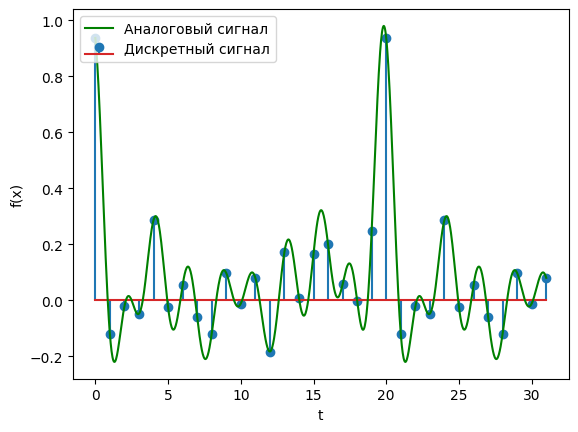

In [3]:
import matplotlib.pyplot as plt


analog_x = np.linspace(0, N-1, 1000)
analog_y = [signal(t) for t in analog_x]

plt.figure()
plt.stem(x, y, label='Дискретный сигнал')
plt.plot(analog_x, analog_y, label='Аналоговый сигнал', color='g')
plt.xlabel('t')
plt.ylabel('f(x)')
plt.legend()

3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Text(0.5, 1.0, 'Спектр дискретного сигнала')

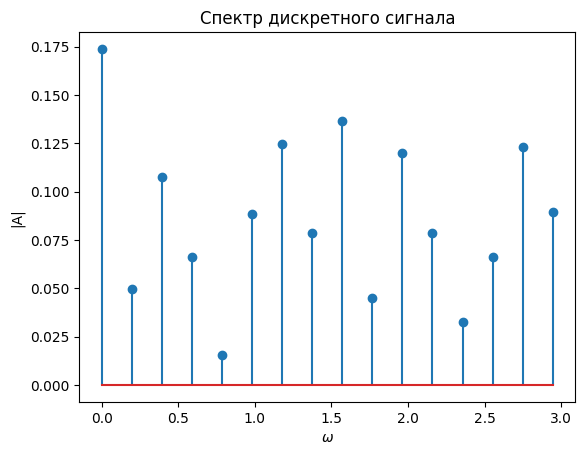

In [10]:
def dft(n: int):
  return np.sum([y_k * np.exp(-1j*(2*np.pi*n*k)/N) for y_k, k in zip(y, range(N))])


W = np.fft.fftfreq(N)[:N // 2] * 2 * np.pi
F = np.fft.fft(y, norm='forward')[:N // 2] * 2

plt.figure()
plt.stem(W, [abs(f) for f in F])
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала')

4. Для дискретного сигнала применить линейное сглаживание по пяти и девяти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Дискретный сигнал:
$$s_n=\sum^{11}_{k=1}A_k\cos(\omega_kn+\varphi_k), n=0,1,...,31$$
Линейное сглаживание по **пяти** точкам:
$$y_n=\frac{1}{5}\sum^{k=n+2}_{k=n-2}s_k=\frac{1}{5}(s_{n-2}+s_{n-1}+s_n+s_{n+1}+s_{n+2})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{5}(1+2\cos(\omega)+2\cos(2\omega))$$

Линейное сглаживание по **девяти** точкам:
$$y_n=\frac{1}{9}\sum^{k=n+4}_{k=n-4}s_k$$
Частотная характеристика:
$$H(\omega)=\frac{1}{9}(1+2\cos(\omega)+2\cos(2\omega)+2\cos(3\omega)+2\cos(4\omega))$$

In [12]:
# Линейное сглаживание по пяти точкам
def l_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2]) / 5)
    return ([0] * 2) + y + ([0] * 2)

y_5_l = l_5(y)

In [13]:
# Линейное сглаживание по девяти точкам
def l_9(S):
    y = []
    for i in range(4, N - 4):
        y.append(sum([S[i+k] for k in range(-4, 5)]) / 9)
    return ([0] * 4) + y + ([0] * 4)


y_9_l = l_9(y)

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

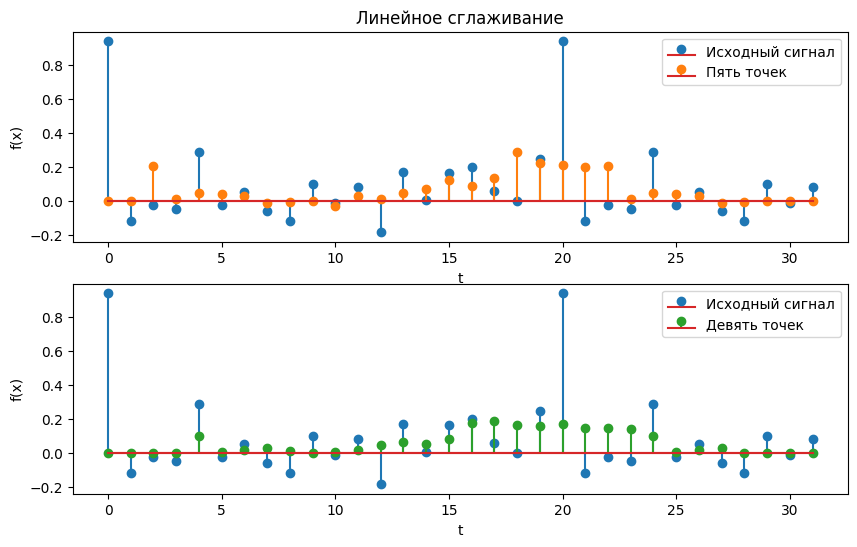

In [30]:
import matplotlib.pyplot as plt


_, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('Линейное сглаживание')

ax1.stem(x, y, label='Исходный сигнал', linefmt='C0-')
ax1.stem(x, y_5_l, label='Пять точек', linefmt='C1-')

ax2.stem(x, y, label='Исходный сигнал', linefmt='C0-')
ax2.stem(x, y_9_l, label='Девять точек', linefmt='C2-')

for ax in [ax1, ax2]:
  ax.set_xlabel('t')
  ax.set_ylabel('f(x)')
  ax.legend()

6. С помощью ДПФ найти дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отсчётами спектра исходного дискретного сигнала.

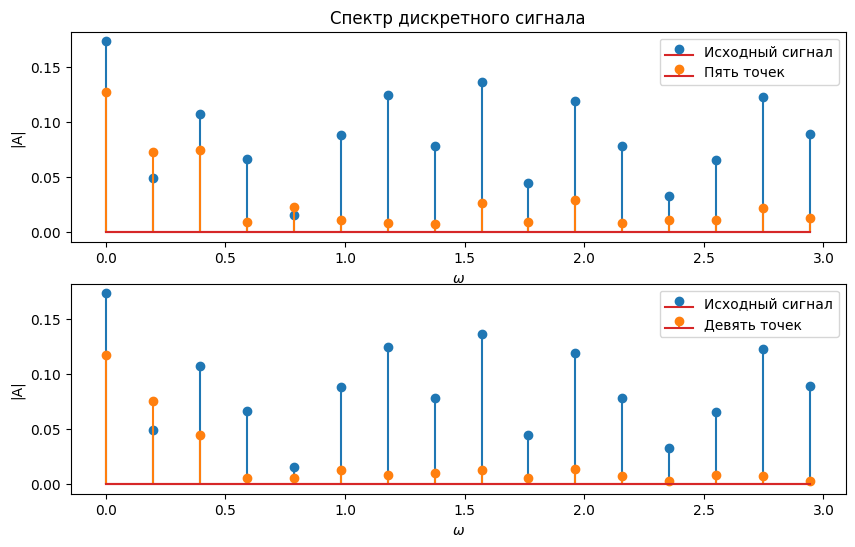

In [32]:
F_5_l = np.fft.fft(y_5_l, norm='forward')[:N // 2] * 2
F_9_l = np.fft.fft(y_9_l, norm='forward')[:N // 2] * 2

_, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('Спектр дискретного сигнала')

ax1.stem(W, [abs(f) for f in F], label='Исходный сигнал', linefmt='C0-')
ax1.stem(W, [abs(f) for f in F_5_l], label='Пять точек', linefmt='C1-')

ax2.stem(W, [abs(f) for f in F], label='Исходный сигнал', linefmt='C0-')
ax2.stem(W, [abs(f) for f in F_9_l], label='Девять точек', linefmt='C1-')

for ax in [ax1, ax2]:
  ax.set_xlabel('$\\omega$')
  ax.set_ylabel('|A|')
  ax.legend()

7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

В результате применения фильтра наиболее сильно подавляются высокие частоты. Чем больше точек для сглаживания выбрано, тем это выражается сильнее. Изменение спектра сигнала согласуется с частотной характеристикой.

8. Повторить п. 4-7 для следующих фильтров:
    * сглаживание полиномом второй степени по пяти и девяти узлам;
    * сглаживание полиномом четвёртой степени по семи и одиннадцати узлам.

*Сглаживание полиномом второй степени по пяти и девяти узлам*.

По пяти точкам:
$$y_n=\frac{1}{35}(-3s_{n-2}+12s_{n-1}+17s_n+12s_{n+1}-3s_{n+2})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{35}(17+24\cos(\omega)-6\cos(2\omega))$$

По девяти точкам:
$$y_n=\frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_n+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$

In [33]:
# Сглаживание полиномом второй степени по пяти точкам
def p2_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((-3*S[i-2] + 12*S[i-1] + 17*S[i] + 12*S[i+1] - 3*S[i+2]) / 35)
    return ([0] * 2) + y + ([0] * 2)


y_5_p2 = p2_5(y)

In [34]:
# Сглаживание полиномом второй степени по девяти точкам
def p2_9(S):
    y = []
    for i in range(4, N - 4):
        y.append((
            -21*S[i-4] + 14*S[i-3] + 39*S[i-2] + 54*S[i-1] + 59*S[i] +
            54*S[i+1] + 39*S[i+2] + 14*S[i+3] - 21*S[i+4]
        ) / 231)
    return ([0] * 4) + y + ([0] * 4)


y_9_p2 = p2_9(y)

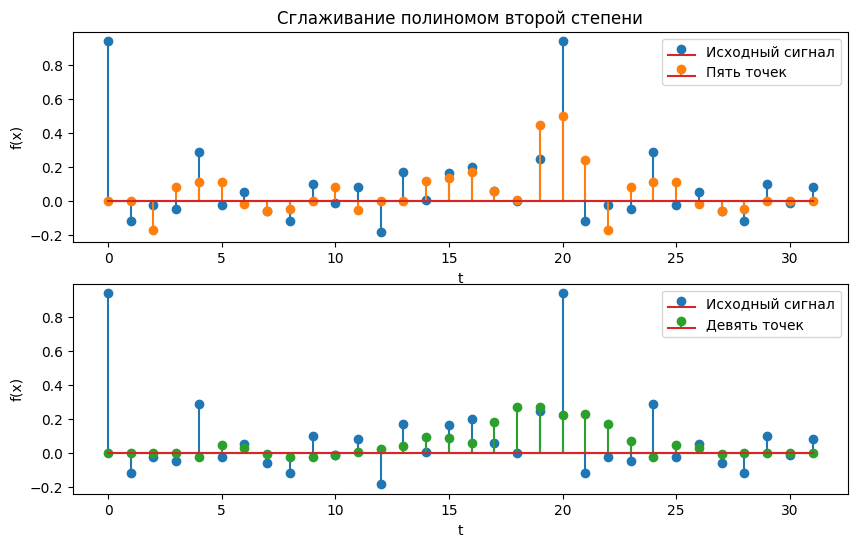

In [35]:
import matplotlib.pyplot as plt


_, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('Сглаживание полиномом второй степени')

ax1.stem(x, y, label='Исходный сигнал', linefmt='C0-')
ax1.stem(x, y_5_p2, label='Пять точек', linefmt='C1-')

ax2.stem(x, y, label='Исходный сигнал', linefmt='C0-')
ax2.stem(x, y_9_p2, label='Девять точек', linefmt='C2-')

for ax in [ax1, ax2]:
  ax.set_xlabel('t')
  ax.set_ylabel('f(x)')
  ax.legend()

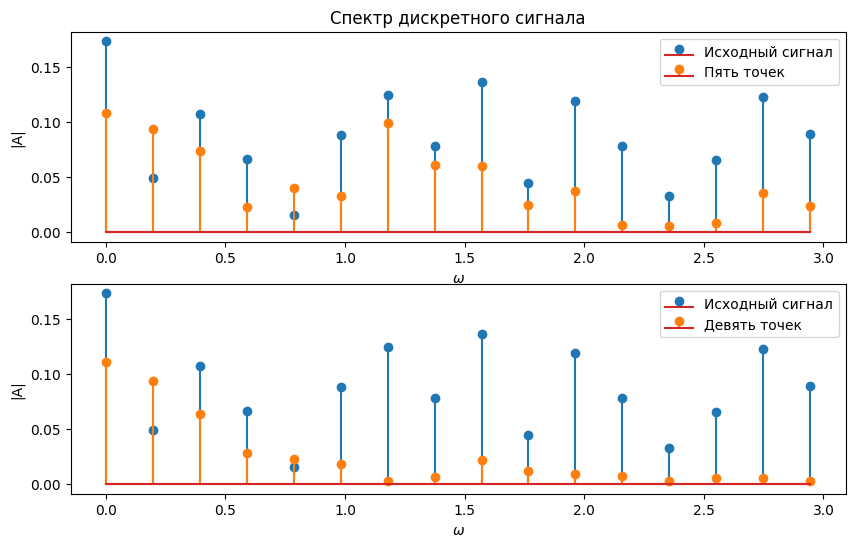

In [36]:
F_5_p2 = np.fft.fft(y_5_p2, norm='forward')[:N // 2] * 2
F_9_p2 = np.fft.fft(y_9_p2, norm='forward')[:N // 2] * 2

_, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('Спектр дискретного сигнала')

ax1.stem(W, [abs(f) for f in F], label='Исходный сигнал', linefmt='C0-')
ax1.stem(W, [abs(f) for f in F_5_p2], label='Пять точек', linefmt='C1-')

ax2.stem(W, [abs(f) for f in F], label='Исходный сигнал', linefmt='C0-')
ax2.stem(W, [abs(f) for f in F_9_p2], label='Девять точек', linefmt='C1-')

for ax in [ax1, ax2]:
  ax.set_xlabel('$\\omega$')
  ax.set_ylabel('|A|')
  ax.legend()

В сравнении со сглаживанием прямой линией высокие частоты подавляются не так сильно. Чем больше точек используется для сглаживания, тем более плавно изменяются значения и более сильно подавляются выступы. Изменение спектра согласуется с частотной характеристикой.

*Сглаживание полиномом четвёртой степени по семи и одиннадцати узлам*.

По семи точкам:
$$y_n=\frac{1}{231}(5s_{n-3}-30s_{n-2}+75s_{n-1}+131s_n+75s_{n+1}-30s_{n+2}+5s_{n+3})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{231}(131+150\cos(\omega)-60\cos(2\omega)+10\cos(3\omega))$$

По одиннадцати точкам:
$$y_n=\frac{1}{429}(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_n+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))$$


In [37]:
# Сглаживание сигнала полиномом четвёртой степени по семи точкам
def p4_7(S):
    y = []
    for i in range(3, N - 3):
        y.append((
            5*S[i-3] - 30*S[i-2] + 75*S[i-1] + 131*S[i]
            + 75*S[i+1] - 30*S[i+2] + 5*S[i+3]
        ) / 231)
    return ([0] * 3) + y + ([0] * 3)


y_7_p4 = p4_7(y)

In [38]:
# Сглаживание сигнала полиномом четвёртой степени по одиннадцати точкам
def p4_11(S):
    y = []
    for i in range(5, N - 5):
        y.append((
            18*S[i-5] - 45*S[i-4] - 10*S[i-3] + 60*S[i-2] + 120*S[i-1] + 143*S[i] +
            120*S[i+1] + 60*S[i+2] - 10*S[i+3] - 45*S[i+4] + 18*S[i+5]
        ) / 429)
    return ([0] * 5) + y + ([0] * 5)


y_11_p4 = p4_11(y)

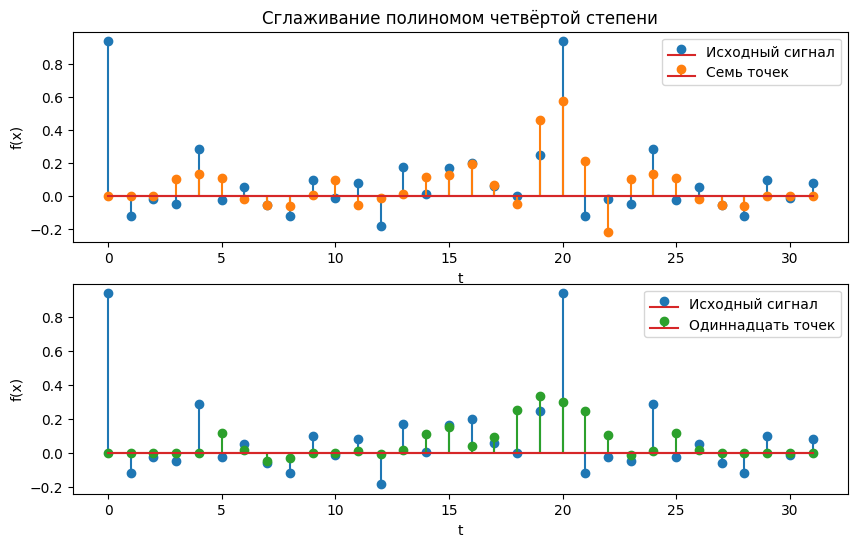

In [39]:
import matplotlib.pyplot as plt


_, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('Сглаживание полиномом четвёртой степени')

ax1.stem(x, y, label='Исходный сигнал', linefmt='C0-')
ax1.stem(x, y_7_p4, label='Семь точек', linefmt='C1-')

ax2.stem(x, y, label='Исходный сигнал', linefmt='C0-')
ax2.stem(x, y_11_p4, label='Одиннадцать точек', linefmt='C2-')

for ax in [ax1, ax2]:
  ax.set_xlabel('t')
  ax.set_ylabel('f(x)')
  ax.legend()

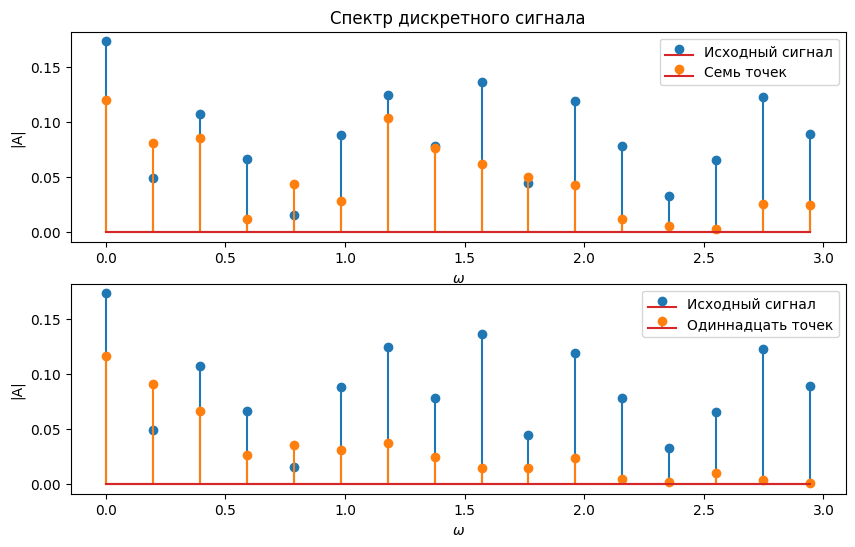

In [40]:
F_7_p4 = np.fft.fft(y_7_p4, norm='forward')[:N // 2] * 2
F_11_p4 = np.fft.fft(y_11_p4, norm='forward')[:N // 2] * 2

_, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('Спектр дискретного сигнала')

ax1.stem(W, [abs(f) for f in F], label='Исходный сигнал', linefmt='C0-')
ax1.stem(W, [abs(f) for f in F_7_p4], label='Семь точек', linefmt='C1-')

ax2.stem(W, [abs(f) for f in F], label='Исходный сигнал', linefmt='C0-')
ax2.stem(W, [abs(f) for f in F_11_p4], label='Одиннадцать точек', linefmt='C1-')

for ax in [ax1, ax2]:
  ax.set_xlabel('$\\omega$')
  ax.set_ylabel('|A|')
  ax.legend()

Разница со сглаживанием полиномом второй степени малозаметна. Полоса пропускания стала немного шире. При увеличении числа точек сглаживания полоса становится уже, высокие частоты подавляются сильнее, но сигнал в целом становится плавнее.

## Выводы

Был сгенерирован сигнал, являющийся линейной комбинацией косинусоид. Полученный сигнал был дискретизирован. Результат дискретизации был визуализирован вместе с аналоговой версией. Для полученного дискретного сигнала построен спектр с использованием дискретного преобразования Фурье.

Для дискретного сигнала были применены:
- линейное сглаживание по пяти и девяти точкам;
- сглаживание полиномом второй степени по пяти и девяти точкам;
- сглаживание полиномом четвёртой степени по семи и одиннадцати точкам.
Для каждого сглаживания был построен спектр сигнала. Каждое применение сглаживания было проанализировано.
Анализ показал следующие результаты: при использовании сглаживания подавляются высокие частоты, сила подавления этих частот имеет обратную зависимость от степени полинома сглаживания. При увеличении количества точек, используемых для сглаживания высокие частоты подавляются сильнее, но при этом сигнал в целом становится плавнее.